In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn import ensemble, tree, linear_model, svm, neighbors

In [2]:
movie=pd.read_csv('movie.csv')
name=pd.read_csv('name.csv')
rating=pd.read_csv('rating.csv')
title=pd.read_csv('title.csv')
award=pd.read_csv('movie awards.csv')

C:\Users\15105\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
award.replace(np.nan,0,inplace=True)
award.rename(columns={'Unnamed: 0':'imdb_title_id'},inplace=True)
award['imdb_title_id'] = award['imdb_title_id'].apply(lambda x: x[2:])  # delete 'tt's in id

In [4]:
title = title[title['category'] == 'director']
title.sort_values(by=['imdb_title_id', 'ordering'])
title.drop_duplicates('imdb_title_id', keep='first', inplace=True)
title.drop(['characters', 'job', 'ordering', 'category'], axis=1, inplace = True)

In [5]:
title = title.merge(name, how='left', on='imdb_name_id')
movie = movie.merge(rating, how='outer', on='imdb_title_id')
df = movie.merge(title, how='left', on='imdb_title_id')
df['imdb_title_id'] = df['imdb_title_id'].apply(lambda x: x[2:])  # delete 'tt's in id

In [6]:
df['year']=df['year'].apply(lambda x:int(re.search(r'(\d{4})',str(x)).group(1)))
df['worlwide_gross_income']=df['worlwide_gross_income'].replace(np.nan,0).apply(lambda x:int(re.search(r'(\d+)',str(x)).group(1)))
df1=df[(df['year']>1960)&(df['votes']>10000)]

In [7]:
dummies = df1['genre'].str.get_dummies(sep=', ')
df1 = pd.concat([df1, dummies], axis=1)
df1=df1.iloc[:,:-1]
df1.drop("genre", inplace=True, axis=1)

In [8]:
dummies = df1['country'].str.get_dummies(sep=', ')
df1 = pd.concat([df1, dummies], axis=1)
df1=df1.iloc[:,:-1]
df1.drop("country", inplace=True, axis=1)

In [9]:
dummies = df1['language'].str.get_dummies(sep=', ')
df1 = pd.concat([df1, dummies], axis=1)
df1=df1.iloc[:,:-1]
df1.drop("language", inplace=True, axis=1)

In [10]:
df2=df1.drop(
    ['title',
 'original_title',
 'date_published',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'budget',
 'usa_gross_income',
 'metascore','weighted_average_vote',
 'total_votes',
 'mean_vote',
 'median_vote',
 'votes_10',
 'votes_9',
 'votes_8',
 'votes_7',
 'votes_6',
 'votes_5',
 'votes_4',
 'votes_3',
 'votes_2',
 'votes_1',
 'allgenders_0age_avg_vote',
 'allgenders_0age_votes',
 'allgenders_18age_avg_vote',
 'allgenders_18age_votes',
 'allgenders_30age_avg_vote',
 'allgenders_30age_votes',
 'allgenders_45age_avg_vote',
 'allgenders_45age_votes',
 'males_allages_avg_vote',
 'males_allages_votes',
 'males_0age_avg_vote',
 'males_0age_votes',
 'males_18age_avg_vote',
 'males_18age_votes',
 'males_30age_avg_vote',
 'males_30age_votes',
 'males_45age_avg_vote',
 'males_45age_votes',
 'females_allages_avg_vote',
 'females_allages_votes',
 'females_0age_avg_vote',
 'females_0age_votes',
 'females_18age_avg_vote',
 'females_18age_votes',
 'females_30age_avg_vote',
 'females_30age_votes',
 'females_45age_avg_vote',
 'females_45age_votes',
 'top1000_voters_rating',
 'top1000_voters_votes',
 'us_voters_rating',
 'us_voters_votes',
 'non_us_voters_rating',
 'non_us_voters_votes',
 'imdb_name_id',
 'name',
 'birth_name',
 'height',
 'bio',
 'birth_details',
 'date_of_birth',
 'place_of_birth',
 'death_details',
 'date_of_death',
 'place_of_death',
 'reason_of_death',
 'spouses_string',
 'spouses',
 'divorces',
 'spouses_with_children',
 'children'
],axis=1)

In [11]:
df3=df2.replace(np.nan,0).merge(award,how='left',on='imdb_title_id')
df3.set_index('imdb_title_id', inplace=True)

In [24]:
def load_train_data():
    Y = df3.avg_vote
    X = df3.drop(['avg_vote'], axis=1)

    X_, X_test, y_, y_test = train_test_split(
        X, Y, test_size=0.1, random_state=10)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_, y_, test_size=0.2, random_state=10)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = load_train_data()

In [25]:
from sklearn.preprocessing import StandardScaler
def load_train_scaled_data():
    Y = df3.avg_vote
    X = df3.drop(['avg_vote'], axis=1)
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X_, X_test, y_, y_test = train_test_split(
        X, Y, test_size=0.1, random_state=10)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_, y_, test_size=0.2, random_state=10)

    return X_train, X_valid, X_test, y_train, y_valid, y_test

Xs_train, Xs_valid, Xs_test, ys_train, ys_valid, ys_test = load_train_scaled_data()

# LinearRegression

In [26]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
def adr2(true_y, predict, p):
    n = true_y.size
    return 1-((1-r2_score(true_y,predict))*(n-1))/(n-p-1)

In [28]:
model = LinearRegression()
model.fit(Xs_train, ys_train)
predict_o = model.predict(Xs_train)
p = Xs_train.shape[1]
print(adr2(ys_train, predict_o, p))
predict=model.predict(Xs_test)
print(np.sqrt(mean_squared_error(ys_test, predict)))

0.4745339776402884
70394353967098.86


In [29]:
model=Lasso(alpha=0.02)
model.fit(Xs_train, ys_train)
predict_o = model.predict(Xs_train)
p = Xs_train.shape[1]
print(adr2(ys_train, predict_o, p))
predict=model.predict(Xs_test)
print(np.sqrt(mean_squared_error(ys_test, predict)))
print(model.coef_)

0.44212497508705983
0.7397824845277206
[-2.72753634e-01  1.23183182e-01  2.52138534e-01 -1.15099976e-02
 -2.98599315e-02  1.28039275e-01 -5.39349040e-02 -4.02604594e-02
  1.04805032e-01  4.40633006e-02 -0.00000000e+00  5.12481496e-03
  1.87528522e-01 -7.26611331e-03 -3.19018064e-02  0.00000000e+00
 -1.01939673e-01  0.00000000e+00 -1.15040778e-04 -0.00000000e+00
 -1.46890954e-02 -2.67643888e-02  0.00000000e+00  0.00000000e+00
  3.06860689e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.23944018e-03  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.19136923e-03
  0.00000000e+00  0.00000000e+00  5.32240997e-03  0

In [30]:
featurelist=list(df3.drop(['avg_vote'], axis=1).columns[model.coef_!=0])
print(len(featurelist))

41


In [31]:
def load_train_selected_scaled_data():
    Y = df3.avg_vote
    X = df3.drop(['avg_vote'], axis=1)
    X=X[featurelist]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    X_, X_test, y_, y_test = train_test_split(
        X, Y, test_size=0.1, random_state=10)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_, y_, test_size=0.2, random_state=10)

    return X_train, X_test, X_valid, y_train, y_test, y_valid

Xs_train, Xs_test, Xs_valid, ys_train, ys_test ,ys_valid= load_train_selected_scaled_data()

RMSE for KNN(k = 1): 0.935918415195126
RMSE for KNN(k = 2): 0.8419726851068812
RMSE for KNN(k = 3): 0.815625253439654
RMSE for KNN(k = 4): 0.7829408029111345
RMSE for KNN(k = 5): 0.7794566383373026
RMSE for KNN(k = 6): 0.7819074744073277
RMSE for KNN(k = 7): 0.7758459178184
RMSE for KNN(k = 8): 0.77702777060317
RMSE for KNN(k = 9): 0.7712077429835826
RMSE for KNN(k = 10): 0.7739881027706947
RMSE for KNN(k = 11): 0.773445665915142
RMSE for KNN(k = 12): 0.7671365096524245
RMSE for KNN(k = 13): 0.7680819458892512
RMSE for KNN(k = 14): 0.7690607437909917
RMSE for KNN(k = 15): 0.7695921951718547
RMSE for KNN(k = 16): 0.7679560048099594
RMSE for KNN(k = 17): 0.7689009858478153
RMSE for KNN(k = 18): 0.7723761650923693
RMSE for KNN(k = 19): 0.7733524134650712
RMSE for KNN(k = 20): 0.7730902048649948
RMSE for KNN(k = 21): 0.7719334945821574
RMSE for KNN(k = 22): 0.7759546566713377
RMSE for KNN(k = 23): 0.7772557390644588
RMSE for KNN(k = 24): 0.7768873222641269
RMSE for KNN(k = 25): 0.777261181

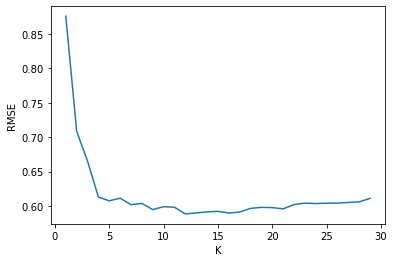

In [32]:
mse = []
for n in range(1, 30):
    model_KNeighborsRegressor = neighbors.KNeighborsRegressor(n_neighbors = n)
    model_KNeighborsRegressor.fit(Xs_train, ys_train)
    y_pred_knn = model_KNeighborsRegressor.predict(Xs_test)
    loss = np.sum(np.square(y_pred_knn - ys_test) / ys_test.shape[0])
    print("RMSE for KNN(k = {}):".format(n), np.sqrt(loss))
    mse.append(loss)


plt.plot(range(1, 30), mse)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

# SVR

In [33]:
linear = svm.SVR(kernel = 'linear')
rbf = svm.SVR(kernel = 'rbf')
poly = svm.SVR(kernel = 'poly')

linear.fit(Xs_train, ys_train)
rbf.fit(Xs_train, ys_train)
poly.fit(Xs_train, ys_train)

print("RMSE for SVR_linear:", np.sqrt(np.sum((linear.predict(Xs_test) - ys_test)**2/ys_test.shape[0])))
print("RMSE for SVR_rbf:", np.sqrt(np.sum((rbf.predict(Xs_test) - ys_test)**2/ys_test.shape[0])))
print("RMSE for SVR_poly:", np.sqrt(np.sum((poly.predict(Xs_test) - ys_test)**2/ys_test.shape[0])))

RMSE for SVR_linear: 0.7458124112009672
RMSE for SVR_rbf: 0.6809074787237253
RMSE for SVR_poly: 0.7560150613499428


In [34]:
rmse = []
for n in range(1, 16):
    rbf = svm.SVR(kernel = 'rbf', C=n)
    rbf.fit(Xs_train, ys_train)
    loss = np.sqrt(np.sum((rbf.predict(Xs_test) - ys_test)**2/ys_test.shape[0]))
    print("RMSE for SVR_rbf(C = {}):".format(n), np.sqrt(np.sum((rbf.predict(Xs_test) - ys_test)**2/ys_test.shape[0])))
    rmse.append(loss)

RMSE for SVR_rbf(C = 1): 0.6809074787237253
RMSE for SVR_rbf(C = 2): 0.6776930378135689
RMSE for SVR_rbf(C = 3): 0.6745772909423922
RMSE for SVR_rbf(C = 4): 0.6735695657163937
RMSE for SVR_rbf(C = 5): 0.6740652336122875
RMSE for SVR_rbf(C = 6): 0.6747148946386825
RMSE for SVR_rbf(C = 7): 0.6749441451916742
RMSE for SVR_rbf(C = 8): 0.6756547825949983
RMSE for SVR_rbf(C = 9): 0.6765660827155171
RMSE for SVR_rbf(C = 10): 0.6777659075831873
RMSE for SVR_rbf(C = 11): 0.6789856613579784
RMSE for SVR_rbf(C = 12): 0.6802148385693313
RMSE for SVR_rbf(C = 13): 0.6812525142640382
RMSE for SVR_rbf(C = 14): 0.6821311758871194
RMSE for SVR_rbf(C = 15): 0.6832875851902428


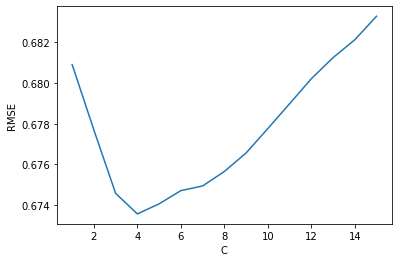

In [35]:
plt.plot(range(1, 16), rmse)
plt.xlabel('C')
plt.ylabel('RMSE')
plt.show()

# Decision Tree

RMSE for decision tree(k=2): 0.8814419356616626
RMSE for decision tree(k=3): 0.8459043808758097
RMSE for decision tree(k=4): 0.8326683295652554
RMSE for decision tree(k=5): 0.8090854640145569
RMSE for decision tree(k=6): 0.7849962832503147
RMSE for decision tree(k=7): 0.7669972289699181
RMSE for decision tree(k=8): 0.7577084208314248
RMSE for decision tree(k=9): 0.7601491770823602
RMSE for decision tree(k=10): 0.7884564799469289
RMSE for decision tree(k=11): 0.8133253857340472


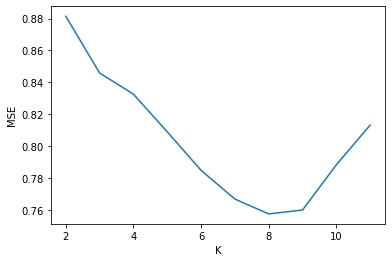

In [36]:
mse = []
for i in range(2, 12):
    model_dt = tree.DecisionTreeRegressor(max_depth=i)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    loss = np.sqrt(np.sum(np.square(y_pred_dt - y_test) / y_test.shape[0]))
    print('RMSE for decision tree(k={}):'.format(i), loss)
    mse.append(loss)
    
    
plt.plot(range(2, 12), mse)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

In [37]:
# best model
model_dt = tree.DecisionTreeRegressor(max_depth=8)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
loss = np.sqrt(np.sum(np.square(y_pred_dt - y_test) / y_test.shape[0]))
print('RMSE for decision tree(k={}):'.format(i), loss)

RMSE for decision tree(k=11): 0.7576993800260977


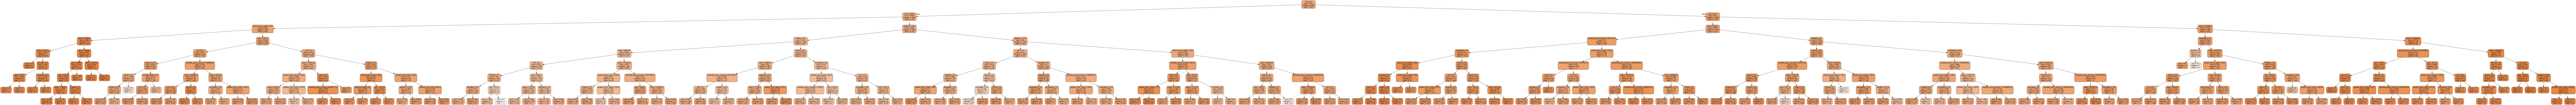

In [38]:
#Visualization needs Graphviz
from IPython.display import Image  
import sys
import os  
import pydotplus 
X = df3.drop(['avg_vote'], axis=1)


dot_data = tree.export_graphviz(model_dt, out_file=None, 
                         feature_names=X.columns,   
                         class_names=['y_train'],    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('example.png')   
Image(graph.create_png()) 

# GradientBoosting

In [39]:
GBR = GradientBoostingRegressor(n_estimators=500,learning_rate=0.05)
GBR.fit(X_train, y_train)
feature_importance = GBR.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


y_pred_gbr = GBR.predict(X_test)
print("RMSE for Gradient Boosting:", np.sqrt(np.sum(np.square(y_pred_gbr - y_test) / y_test.shape[0])))

RMSE for Gradient Boosting: 0.6333450411947461


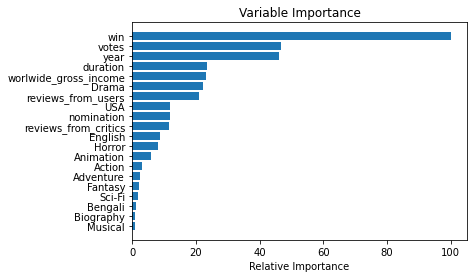

In [40]:
plt.barh(pos[-20:], feature_importance[sorted_idx[-20:]], align='center')
plt.yticks(pos[-20:], X_train.columns[sorted_idx[-20:]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('1.eps',format='eps')
plt.show()

<AxesSubplot:>

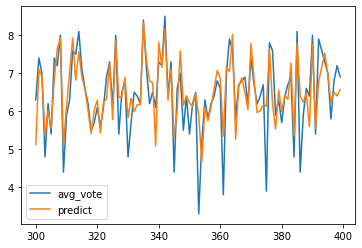

In [41]:
dd=pd.DataFrame(y_test)
dd['predict']=y_pred_gbr

d1=dd.reset_index().drop('imdb_title_id',axis=1)
d1.iloc[300:400].plot()

# Neural Network

In [42]:
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization
from keras.losses import mse
from keras.callbacks import EarlyStopping, ModelCheckpoint

inputs = Input(shape=(Xs_train.shape[1],), name='input')
logits = BatchNormalization()(inputs)
logits = Dense(256, activation='relu')(logits)
logits = Dense(64, activation='relu')(logits)
out = Dense(1, activation='relu')(logits)
model = Model(inputs=[inputs], outputs=out)
model.compile(optimizer='adam', loss=mse)

check_point = ModelCheckpoint('model.hdf5', verbose=True, save_best_only=True)
early_stop = EarlyStopping(patience=8, verbose=True)
model.fit(Xs_train, ys_train,
          validation_data=(Xs_valid, ys_valid),
          epochs=40,
          verbose=True,
          callbacks=[early_stop, check_point])

model.load_weights('model.hdf5')
y_pred_nn = model.predict(Xs_test).reshape(ys_test.shape)
print("RMSE for NN:", np.sqrt(np.sum(np.square(y_pred_nn - ys_test) / ys_test.shape[0])))

Epoch 1/40
152/183 [=======================>......] - ETA: 0s - loss: 4.7887
Epoch 00001: val_loss improved from inf to 2.97103, saving model to model.hdf5
183/183 [==============================] - 1s 2ms/step - loss: 4.1622 - val_loss: 2.9710
Epoch 2/40
148/183 [=======================>......] - ETA: 0s - loss: 0.8293
Epoch 00002: val_loss improved from 2.97103 to 2.06397, saving model to model.hdf5
183/183 [==============================] - 0s 1ms/step - loss: 0.8228 - val_loss: 2.0640
Epoch 3/40
152/183 [=======================>......] - ETA: 0s - loss: 0.7894
Epoch 00003: val_loss improved from 2.06397 to 1.57139, saving model to model.hdf5
183/183 [==============================] - 0s 1ms/step - loss: 0.7621 - val_loss: 1.5714
Epoch 4/40
152/183 [=======================>......] - ETA: 0s - loss: 0.6555
Epoch 00004: val_loss did not improve from 1.57139
183/183 [==============================] - 0s 1ms/step - loss: 0.6543 - val_loss: 2.0871
Epoch 5/40
149/183 [====================

Epoch 00036: early stopping
RMSE for NN: 1.020839133414083
